In [1]:
import urllib.request
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import gzip

import tensorflow as tf
import tensorflow.keras as k

In [2]:
# URL of the Fashion MNIST dataset files
url = 'https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/'

# Create a directory to store the downloaded files
if not os.path.exists('tests/data'):
    os.makedirs('tests/data')

# Download the training and testing image files
for file_name in ['train-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz']:
    file_url = url + file_name
    file_path = os.path.join('tests/data', file_name)
    if not os.path.exists(file_path):
        urllib.request.urlretrieve(file_url, file_path)

# Download the training and testing label files
for file_name in ['train-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz']:
    file_url = url + file_name
    file_path = os.path.join('tests/data', file_name)
    if not os.path.exists(file_path):
        urllib.request.urlretrieve(file_url, file_path)

In [3]:
# Load the training and testing image files
with gzip.open('tests/data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
with gzip.open('tests/data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)

# Load the training and testing label files
with gzip.open('tests/data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_labels = np.frombuffer(f.read(), np.uint8, offset=8)
with gzip.open('tests/data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_labels = np.frombuffer(f.read(), np.uint8, offset=8)

print('train set shape:', train_images.shape, 'test set shape:', test_images.shape)

train set shape: (60000, 28, 28) test set shape: (10000, 28, 28)


In [4]:
# Label index to label name relation
fashion_mnist_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

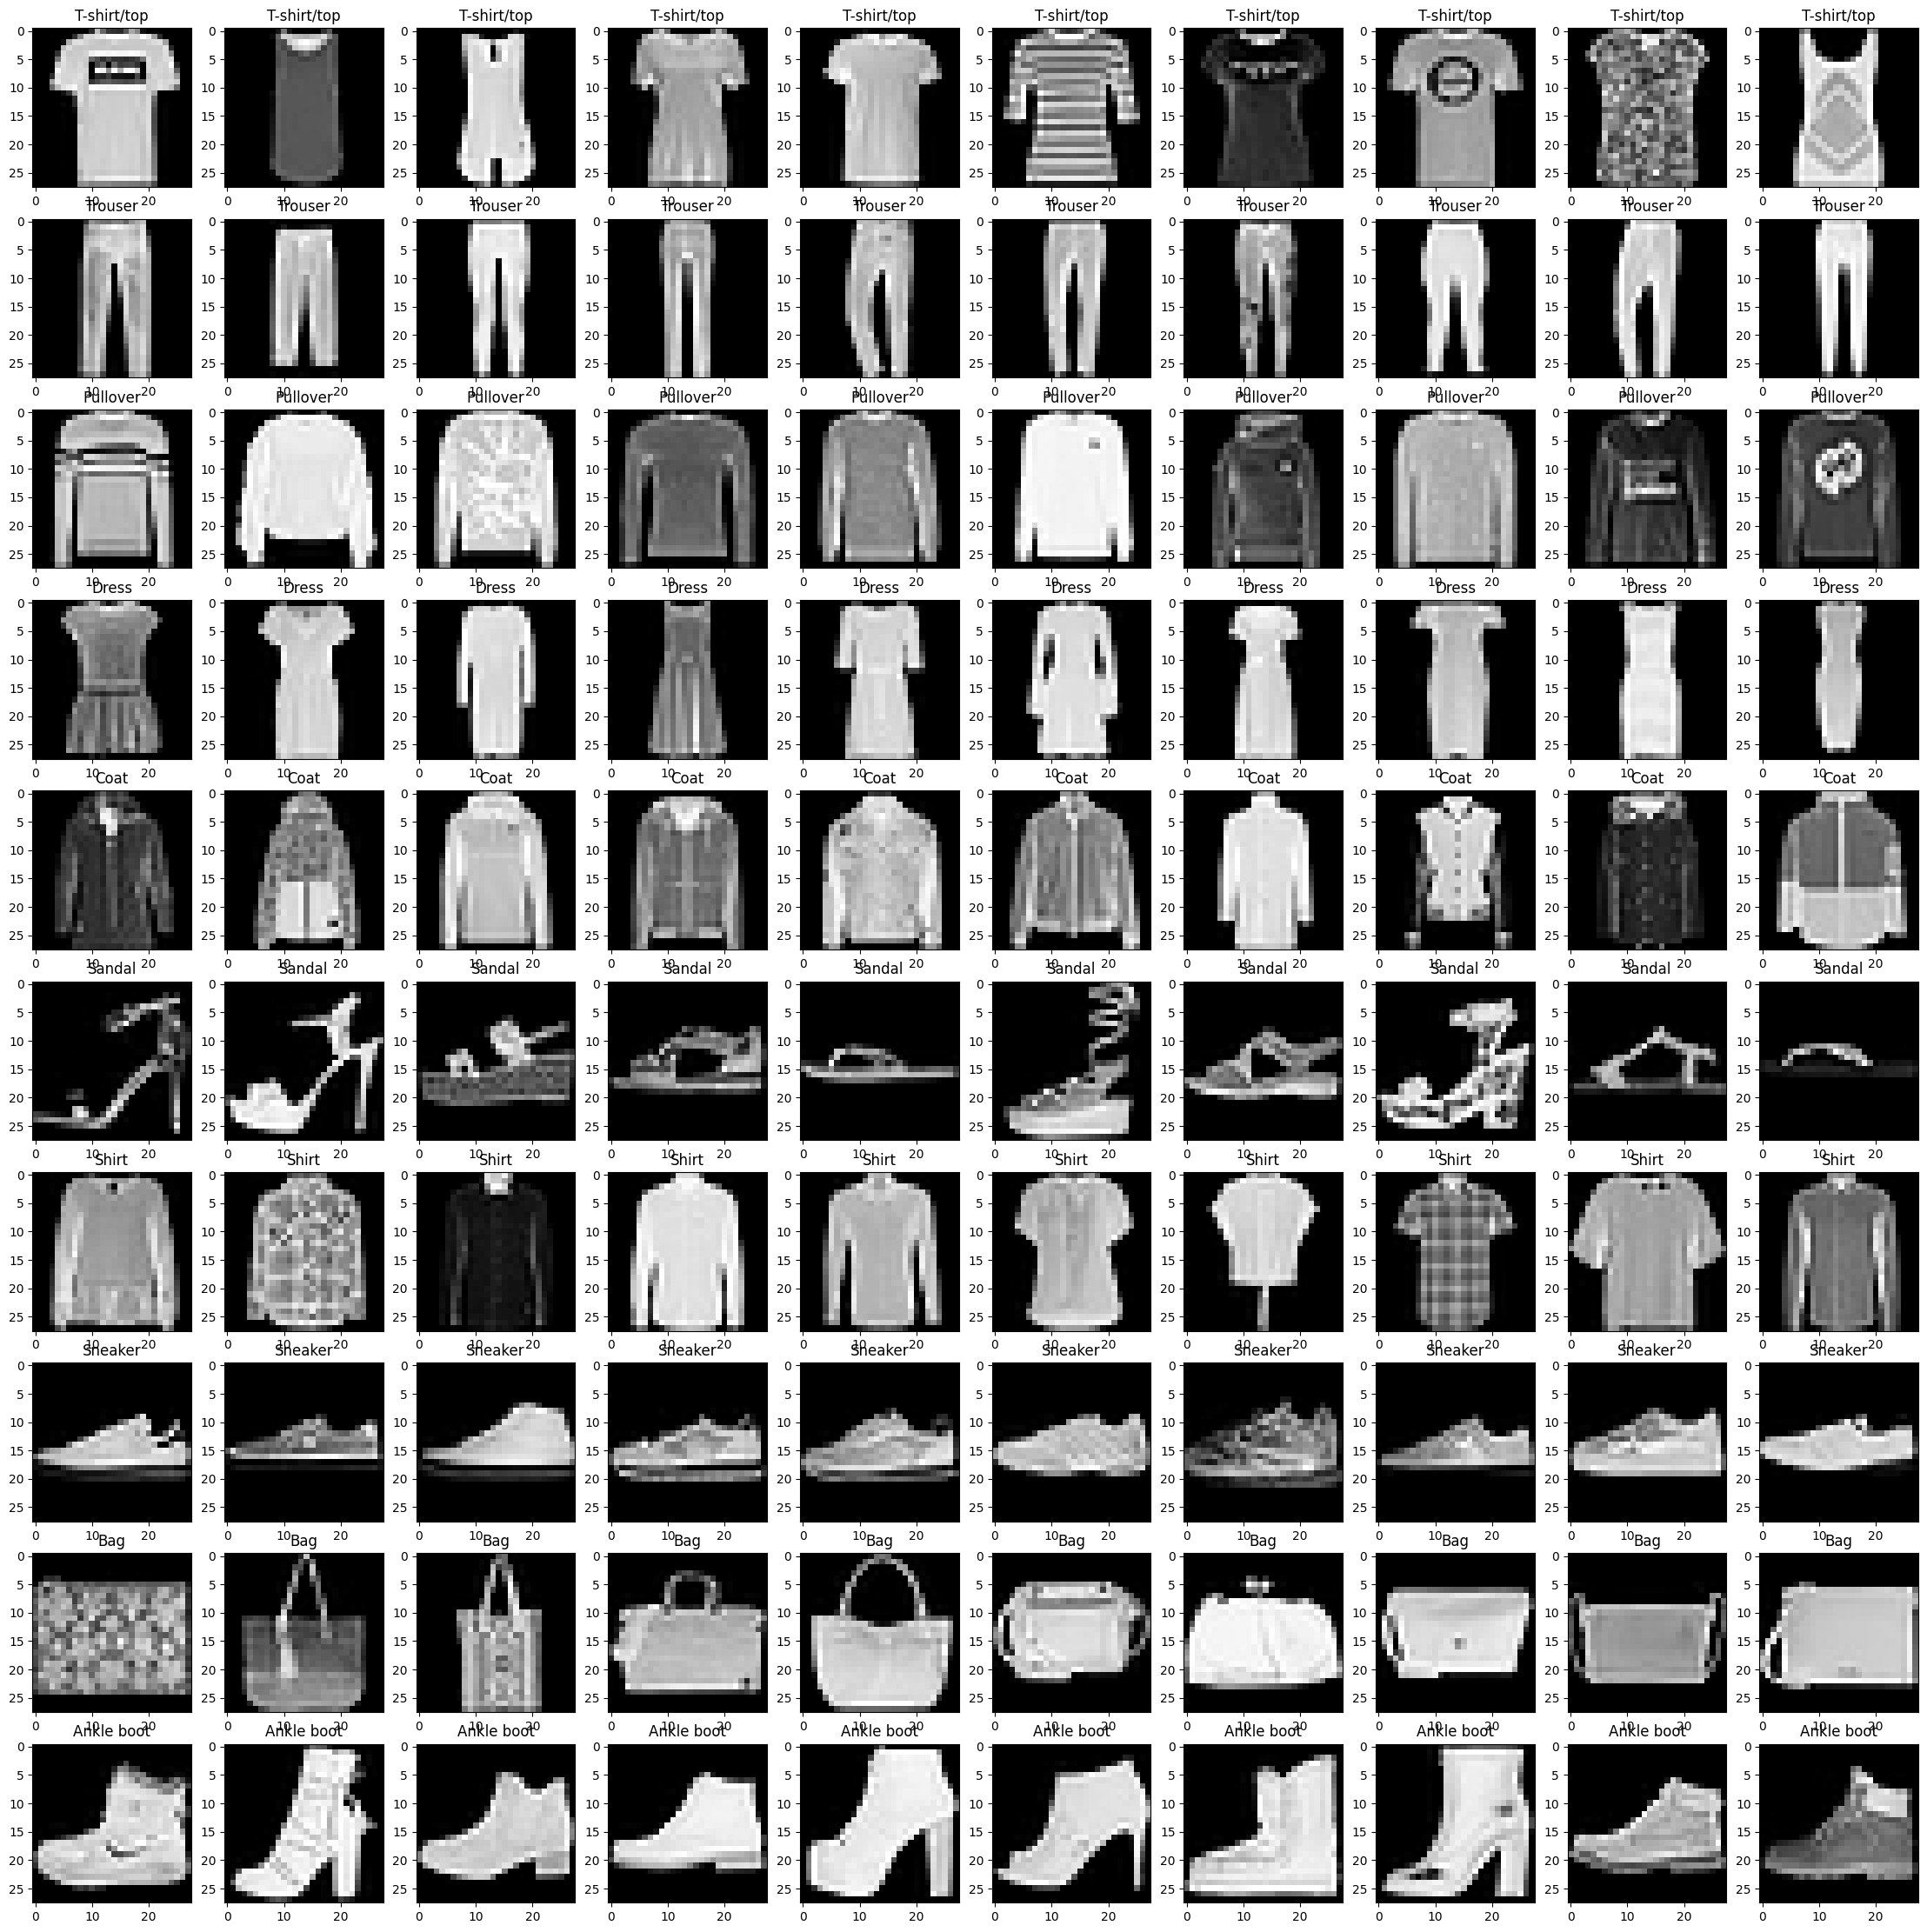

In [5]:
figure, ax = plt.subplots(10, 10, figsize=(28, 28))
for label in range(10):
    samples = train_images[train_labels == label]
    for i in range(10):
        ax[label, i].imshow(samples[i], cmap='gray')
        ax[label, i].set_title(fashion_mnist_labels[label])
plt.show()

In [6]:
# Flatten and Min-Max scale to (-1, 1)
X = (train_images.astype(np.float32) - 127.5) / 127.5
X_test = (test_images.astype(np.float32) - 127.5) / 127.5

In [7]:
X.shape

(60000, 28, 28)

In [8]:
# Convert labels to one-hot encoding
# train_labels = tf.keras.utils.to_categorical(train_labels)
# test_labels = tf.keras.utils.to_categorical(test_labels)

In [9]:
## Instantiate model
# model = k.Sequential([
    # k.Input(shape=(28, 28, 1)),
    # k.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'),# (_, 28, 28, 1)
    # k.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),# (_, 28, 28, 32)
    # k.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'), # (_, 13, 13, 64)
    # k.layers.AveragePooling2D(),
    # k.layers.BatchNormalization(),
    # k.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'),# (_, 28, 28, 1)
    # k.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),# (_, 28, 28, 32)
    # k.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'), # (_, 13, 13, 64)
    # k.layers.AveragePooling2D(),
    # k.layers.BatchNormalization(),
    # k.layers.Flatten(),
    # k.layers.Dense(10)

# ])

In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
   tf.keras.layers.Dense(10)    
])

In [11]:
# lr_schedule = k.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.9)


model.compile(loss=k.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=k.optimizers.Adam(),
              metrics = ['accuracy'])

In [12]:
history=model.fit(X, train_labels, validation_data=(X_test, test_labels),
            epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 21s 16ms/step - loss: 0.4537 - accuracy: 0.8384 - val_loss: 0.3299 - val_accuracy: 0.8800
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2892 - accuracy: 0.8955 - val_loss: 0.3029 - val_accuracy: 0.8937
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2441 - accuracy: 0.9123 - val_loss: 0.2548 - val_accuracy: 0.9081
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2125 - accuracy: 0.9232 - val_loss: 0.2593 - val_accuracy: 0.9067
Epoch 5/20
469/469 [==============================] - 4s 10ms/step - loss: 0.1896 - accuracy: 0.9311 - val_loss: 0.2479 - val_accuracy: 0.9142
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1673 - accuracy: 0.9387 - val_loss: 0.2303 - val_accuracy: 0.9181
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1475 - accuracy: 0.9461 - val_loss: 0.2362 - val_accuracy: 0.9189


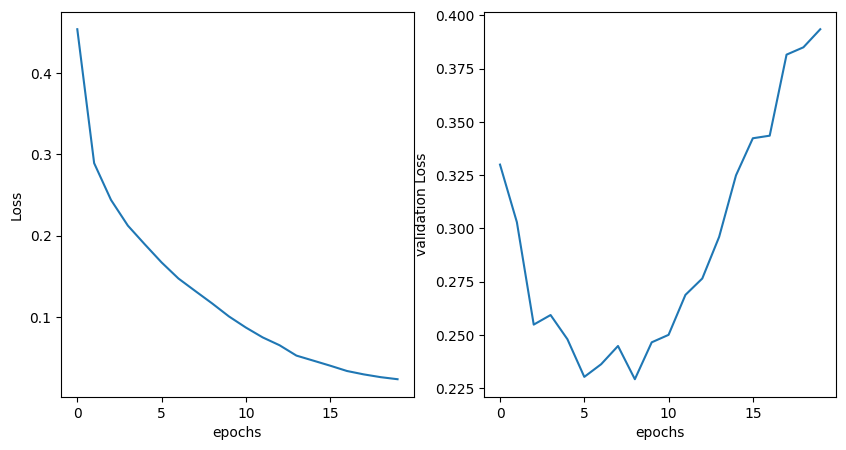

In [13]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

figure, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(train_loss)
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Loss')
ax[1].plot(val_loss)
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('validation Loss')
plt.show()

In [14]:
model.save('tests\\fashion_mnist_small_reg.h5')

In [15]:
# Load the saved model
model = tf.keras.models.load_model('tests\\fashion_mnist_small_reg.h5')

1/1 [==============================] - 0s 130ms/step
tshirt.png --> T-shirt/top (0)
pants.png --> Trouser (1)
pyjamas.jpg --> Trouser (1)
ankle boot.jpg --> Ankle boot (9)
heels.jpg --> Sandal (5)
sneakers.jpg --> Sneaker (7)
sneakers2.jpg --> Sneaker (7)
coat.jpg --> Pullover (2)
coat2.jpg --> Coat (4)


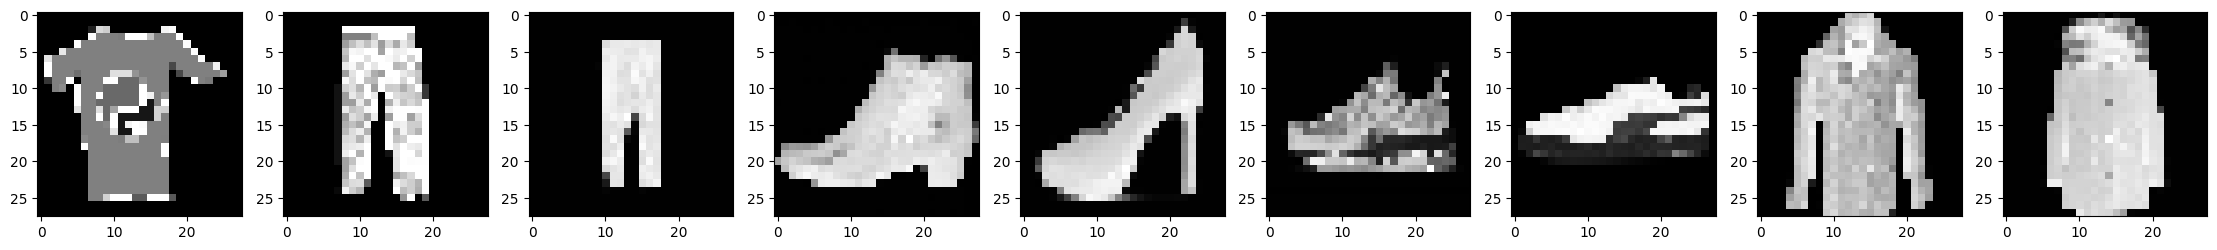

In [16]:
internet_images = ['tshirt.png', 'pants.png', 'pyjamas.jpg', 'ankle boot.jpg', 'heels.jpg', 'sneakers.jpg', 'sneakers2.jpg', 'coat.jpg', 'coat2.jpg']

figure, ax = plt.subplots(1, len(internet_images), figsize=(28, 28))
images = []

for index, image in enumerate(internet_images):

    image_data = cv2.imread('tests/'+image, cv2.IMREAD_GRAYSCALE)
    # resize image to match model input dimensions
    image_data = cv2.resize(image_data, (28, 28))
    # invert colors as fashion mnist has inverted colors (black background and light colors for the cloths)
    image_data = 255 - image_data
    ax[index].imshow(image_data, cmap='gray')

    image_data = (image_data.astype(np.float32) - 127.5) / 127.5
    images.append(image_data)

images = np.array(images)
prediction = model.predict(images)
for i in range(len(internet_images)):
    predicted_class_index = np.argmax(prediction[i])  # Get the index of the highest probability
    predicted_label = fashion_mnist_labels[predicted_class_index]  # Map index to label
    print(internet_images[i], '-->', predicted_label, f'({predicted_class_index})')